In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')

df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
# Coluna de id de passageiros removida, pois é igual ao index.
df_titanic.drop(columns='PassengerId', inplace=True)

# Renomeia Pclass para Passenger Class.
df_titanic.rename(columns={'Pclass':'Passenger Class'}, inplace=True)

# Renomeia colunas.
df_titanic.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)



In [302]:
df_titanic.columns

Index(['survived', 'passenger_class', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [30]:
# Cria nova coluna com categoria de idade.
df_criancas = df_titanic.query('age <= 12').copy()
df_adolescente = df_titanic.query('12 < age <= 18').copy()
df_adulto = df_titanic.query('age > 18').copy()
df_sem_idade = df_titanic[df_titanic['age'].isnull()].copy()

idade_crianca = np.repeat('Criança', df_criancas.shape[0])
idade_adolescente = np.repeat('Adolescente', df_adolescente.shape[0])
idade_adulto = np.repeat('Adulto', df_adulto.shape[0])
idade_desconhecido = np.repeat('Desconhecido', df_sem_idade.shape[0])

df_criancas['age_category'] = idade_crianca
df_adolescente['age_category'] = idade_adolescente
df_adulto['age_category'] = idade_adulto
df_sem_idade['age_category'] = idade_desconhecido

df_titanic_novo = df_criancas.append([df_adolescente, df_adulto, df_sem_idade])
df_titanic_novo.sort_index(inplace=True)


/home/trprado/.local/share/virtualenvs/udacity-WaEjM5--/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


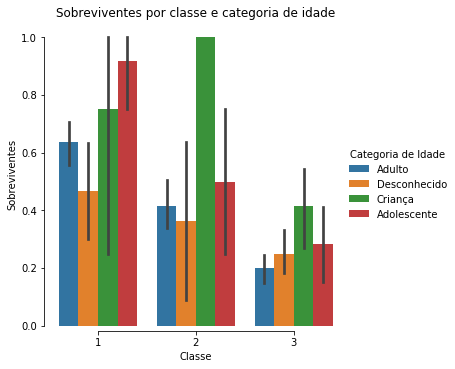

In [300]:
# Gráfico de Sobreviventes por classe e categoria de idade.
g1 = sns.catplot(data=df_titanic_novo, x='passenger_class', y='survived', kind='bar', hue='age_category')
g1._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por classe e categoria de idade')
sns.despine(offset=5, trim=True);

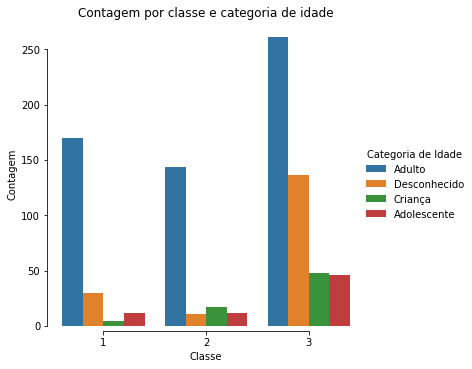

In [17]:
# Gráfico de contagem de passageiros por classe e categoria de idade.
g1 = sns.catplot(data=df_titanic_novo, x='passenger_class', kind='count', hue='age_category')
g1._legend.set_title('Categoria de Idade')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem por classe e categoria de idade')
sns.despine(offset=5, trim=True);

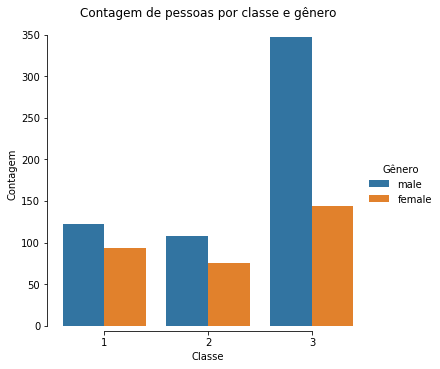

In [315]:
# Gráfico de contagem de passageiros por classe e gênero.
g1 = sns.catplot(data=df_titanic_novo, x='passenger_class', kind='count', hue='sex')
g1._legend.set_title('Gênero')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por classe e gênero')
sns.despine(offset=5, trim=True);

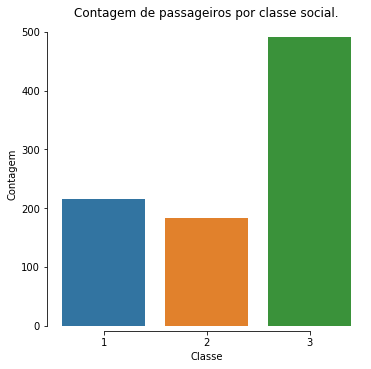

In [35]:
# Contagem de passageiros por classe.
g1 = sns.catplot(data=df_titanic_novo, x='passenger_class', kind='count')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Contagem de passageiros por classe social.')
sns.despine(offset=5, trim=True);

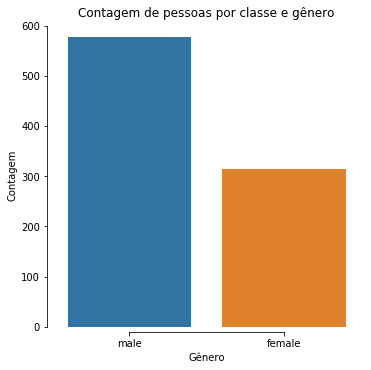

In [313]:
# Contagem de pessoas por gênero.
sns.catplot(data=df_titanic_novo, x='sex', kind='count')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por classe e gênero')
sns.despine(offset=5, trim=True);

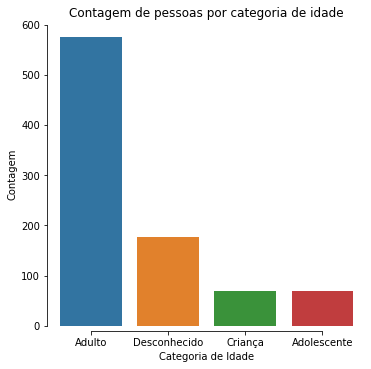

In [312]:
# Contagem de pessoas por categoria de idade.
sns.catplot(data=df_titanic_novo, x='age_category', kind='count')
plt.xlabel('Categoria de Idade')
plt.ylabel('Contagem')
plt.title('Contagem de pessoas por categoria de idade')
sns.despine(offset=5, trim=True);

In [193]:
# Média da idade dos passageiros por categoria.
df_titanic_novo.groupby('age_category')['age'].mean().dropna()

categoria_idade
Adolescente    16.578571
Adulto         34.287826
Criança         4.770580
Name: age, dtype: float64

In [194]:
# Descritiva da categoria de idade dos passageiros.
df_titanic_novo.groupby('age_category')['age'].describe().dropna()

,count,mean,std,min,25%,50%,75%,max
categoria_idade,,,,,,,,
Adolescente,70.0,16.578571,1.438688,13.00,16.0,17.0,18.0,18.0
Adulto,575.0,34.287826,11.988352,19.00,25.0,31.0,41.0,80.0
Criança,69.0,4.770580,3.390390,0.42,2.0,4.0,8.0,12.0


In [195]:
# Descritiva da categoria de idade dos passageiros por classe.
df_titanic_novo.groupby(['age_category', 'passenger_class'])['age'].describe().dropna()

count       mean        std    min    25%  \
categoria_idade passenger_class                                              
Adolescente     1                 12.0  16.666667   1.302678  14.00  16.00   
                2                 12.0  16.750000   1.712255  13.00  16.00   
                3                 46.0  16.510870   1.423958  13.00  16.00   
Adulto          1                170.0  40.550000  13.191091  19.00  30.00   
                2                144.0  34.086806  10.943806  19.00  25.75   
                3                261.0  30.319923   9.841149  19.00  22.00   
Criança         1                  4.0   4.480000   4.530077   0.92   1.73   
                2                 17.0   3.490000   2.521966   0.67   1.00   
                3                 48.0   5.248333   3.510293   0.42   2.00   

                                  50%    75%   max  
categoria_idade passenger_class                     
Adolescente     1                17.0  18.00  18.0  
                2                17.5  18.00  18.0  
                3                17.0  18.00  18.0  
Adulto          1                39.0  50.00  80.0  
                2                31.5  40.00  70.0  
                3                28.0  35.00  74.0  
Criança         1                 3.0   5.75  11.0  
                2                 3.0   5.00   8.0  
                3                 4.0   9.00  12.0

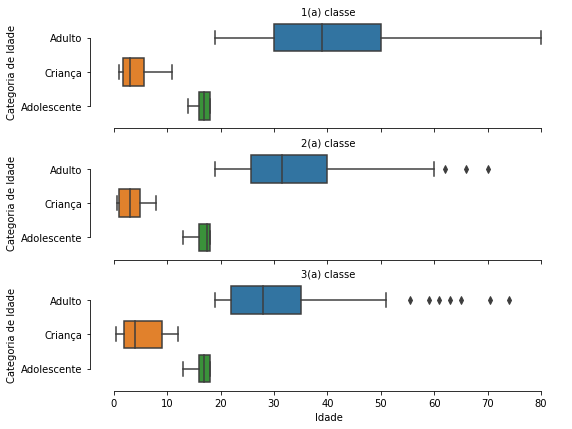

In [343]:
# Gráfico de caixa de categoria de idade por classe.
g1 = sns.catplot(y="age_category", x="age", row="passenger_class",
                 orient="h", height=2, aspect=4, kind="box",
                 data=df_titanic_novo.query('age_category != "Desconhecido"'))
g1.set_ylabels('Categoria de Idade')
g1.set_xlabels('Idade')
g1.set_titles("{row_name}(a) classe")
sns.despine(offset=5, trim=True);

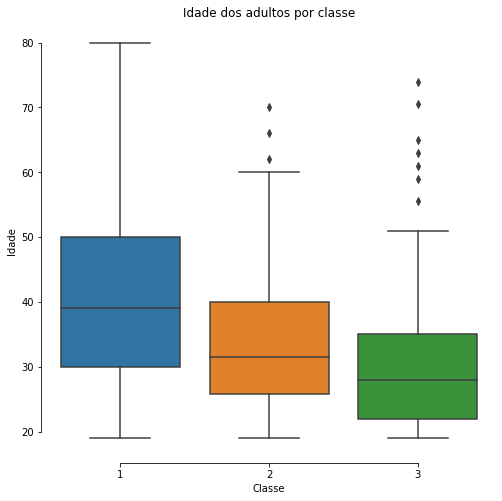

In [342]:
# Gráfico de caixa entre idade de passageiros adultos e classe social.
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x="passenger_class", y="age", 
            data=df_titanic_novo.query('age_category != "Desconhecido" & age > 18'))
plt.ylabel('Idade')
plt.xlabel('Classe')
plt.title("Idade dos adultos por classe")
sns.despine(offset=5, trim=True);

In [241]:
# Contagem de sobreviventes por classe
df_total_survived = df_titanic_novo.query('survived == 1').groupby('passenger_class')['survived'].count()
df_total_survived.loc['total'] = df_total_survived.sum()
df_total_survived

passenger_class
1        136
2         87
3        119
total    342
Name: survived, dtype: int64

In [240]:
# totais das classes.
df_class_total = df_titanic_novo.groupby('passenger_class').count()
df_class_total.loc['total'] = df_class_total.sum()
df_class_total

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,categoria_idade
passenger_class,,,,,,,,,,,
1,216,216,216,186,216,216,216,216,176,214,216
2,184,184,184,173,184,184,184,184,16,184,184
3,491,491,491,355,491,491,491,491,12,491,491
total,891,891,891,714,891,891,891,891,204,889,891


In [296]:
# Total de passageiros por classe.
for n in range(1,4):
    print('Total de pessoas da {}(a) classe no titanic: {}.'.format(n, df_class_total.loc[n]['survived']))
print('Total de sobreviventes: {}.'.format(df_class_total.loc['total']['survived']))

Total de pessoas da 1(a) classe no titanic: 216.
Total de pessoas da 2(a) classe no titanic: 184.
Total de pessoas da 3(a) classe no titanic: 491.
Total de sobreviventes: 891.


In [292]:
# Porcentagem de sobreviventes por classe.
for n in range(1,4):   
    print('Porcentagem de sobreviventes da {}(a) classe: {:.2%}.'.format(n,
        df_total_survived.loc[n] / df_class_total.loc[n]['survived']))
print('Porcentagem de sobreviventes do naufragio: {:.2%}.'.format(df_total_survived.loc['total'] / df_class_total.loc['total']['survived']))

Porcentagem de sobreviventes da 1(a) classe: 62.96%.
Porcentagem de sobreviventes da 2(a) classe: 47.28%.
Porcentagem de sobreviventes da 3(a) classe: 24.24%.
Porcentagem de sobreviventes do naufragio: 38.38%.


In [344]:
# Porcentagem por classes de sobreviventes.
print('Porcentagem por classes de sobreviventes.')
for n in range(1,4):
    print('Porcentagem da {}(a) classe: {:.2%}.'.format(n, df_total_survived.loc[n]/df_total_survived.loc['total']))

print('Total de sobreviventes: {}.'.format(df_total_survived.loc['total']))

Porcentagem por classes de sobreviventes.
Porcentagem da 1(a) classe: 39.77%.
Porcentagem da 2(a) classe: 25.44%.
Porcentagem da 3(a) classe: 34.80%.
Total de sobreviventes: 342.


In [41]:
df_titanic_novo.nunique()

survived             2
passenger_class      3
name               891
sex                  2
age                 88
sibsp                7
parch                7
ticket             681
fare               248
cabin              147
embarked             3
categoria_idade      4
dtype: int64

In [43]:
df_titanic_novo['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [45]:
temp = df_titanic_novo.query('fare != 0')
temp['fare'].describe()

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: fare, dtype: float64

In [437]:
# Mostra os grupos de passageiros que compraram passagens juntos e que ficaram em cabines iguais.
# df_titanic_novo.groupby(['ticket', 'cabin', 'fare']).apply(lambda x: x.head()).head(20)
df_group = df_titanic_novo.groupby(['ticket', 'passenger_class'])
# df_group['fare'].mean()
df_group.apply(lambda x: x.head()).head(20)

df_group['name'].count().describe()
# df_group.mean()['fare']

count    681.000000
mean       1.308370
std        0.792652
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: name, dtype: float64

In [439]:
# Passagens com maior número de passageiros da primeira classe.
df_titanic_novo['freq'] = df_titanic_novo.groupby('ticket')['ticket'].transform('count')
df_titanic_novo.sort_values(by=['freq', 'ticket'], ascending=False).query('passenger_class == 1').head()

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,categoria_idade,freq
380,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,Adulto,4
557,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C,Desconhecido,4
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,Adolescente,4
716,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,Adulto,4
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,Adulto,4


In [440]:
# Passagens com maior número de passageiros da segunda classe.
df_titanic_novo['freq'] = df_titanic_novo.groupby('ticket')['ticket'].transform('count')
df_titanic_novo.sort_values(by=['freq', 'ticket'], ascending=False).query('passenger_class == 2').head()

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,categoria_idade,freq
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S,Adulto,5
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S,Adulto,5
385,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,Adolescente,5
655,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S,Adulto,5
665,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S,Adulto,5


In [441]:
# Passagens com maior número de passageiros da primeira classe.
df_titanic_novo['freq'] = df_titanic_novo.groupby('ticket')['ticket'].transform('count')
df_titanic_novo.sort_values(by=['freq', 'ticket'], ascending=False).query('passenger_class == 3').head()

,survived,passenger_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,categoria_idade,freq
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Desconhecido,7
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Desconhecido,7
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Desconhecido,7
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Desconhecido,7
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Desconhecido,7


In [108]:
# Descritiva da primeira classe.
df_group_first_class = df_titanic_novo.query('passenger_class == 1 & 20 < fare < 200').groupby(['ticket','passenger_class'])
df_group_first_class.mean().describe()

,survived,age,sibsp,parch,fare
count,133.000000,116.000000,133.000000,133.000000,133.000000
mean,0.593358,40.925833,0.307644,0.215539,54.632393
std,0.458625,13.907157,0.464681,0.492273,32.073502
min,0.000000,4.000000,0.000000,0.000000,25.587500
25%,0.000000,30.750000,0.000000,0.000000,29.700000
50%,1.000000,40.000000,0.000000,0.000000,49.500000
75%,1.000000,50.000000,0.666667,0.000000,76.291700
max,1.000000,80.000000,2.000000,2.000000,164.866700


In [356]:
# Descritiva da segunda classe.
df_group_first_class = df_titanic_novo.query('passenger_class == 2 & 5 < fare < 100').groupby(['ticket','passenger_class'])
df_group_first_class.mean().describe()

,survived,age,sibsp,parch,fare
count,136.000000,132.000000,136.000000,136.000000,136.000000
mean,0.466912,31.345783,0.309069,0.256127,18.024693
std,0.473504,12.123868,0.507791,0.576604,9.810122
min,0.000000,2.500000,0.000000,0.000000,10.500000
25%,0.000000,24.000000,0.000000,0.000000,12.818750
50%,0.500000,29.000000,0.000000,0.000000,13.000000
75%,1.000000,36.125000,0.750000,0.000000,26.000000
max,1.000000,70.000000,2.000000,3.000000,73.500000


In [357]:
# Descritiva da terceira classe.
df_group_first_class = df_titanic_novo.query('passenger_class == 3 & 4 < fare < 100').groupby(['ticket','passenger_class'])
df_group_first_class.mean().describe()

,survived,age,sibsp,parch,fare
count,393.000000,282.000000,393.000000,393.000000,393.000000
mean,0.230189,26.745009,0.271017,0.167067,10.102177
std,0.412819,11.018428,0.742287,0.512951,6.315086
min,0.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,20.000000,0.000000,0.000000,7.750000
50%,0.000000,25.000000,0.000000,0.000000,7.895800
75%,0.000000,32.000000,0.000000,0.000000,8.850000
max,1.000000,74.000000,8.000000,2.857143,69.550000


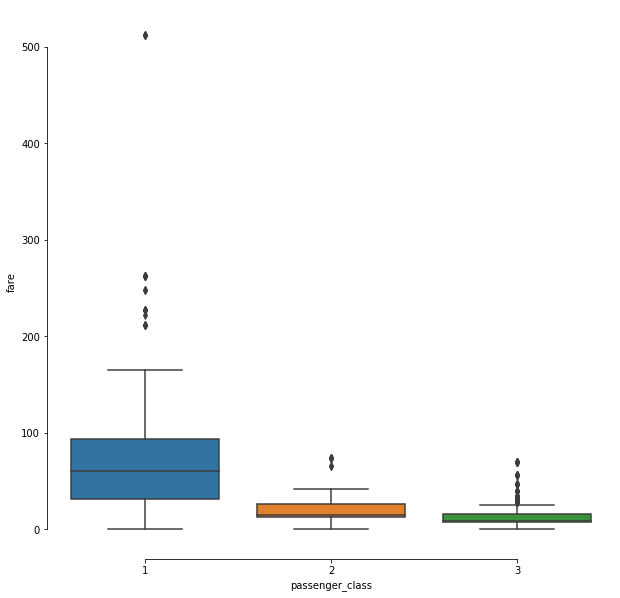

In [120]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="passenger_class", y="fare", data=df_titanic_novo)
sns.despine(offset=5, trim=True);

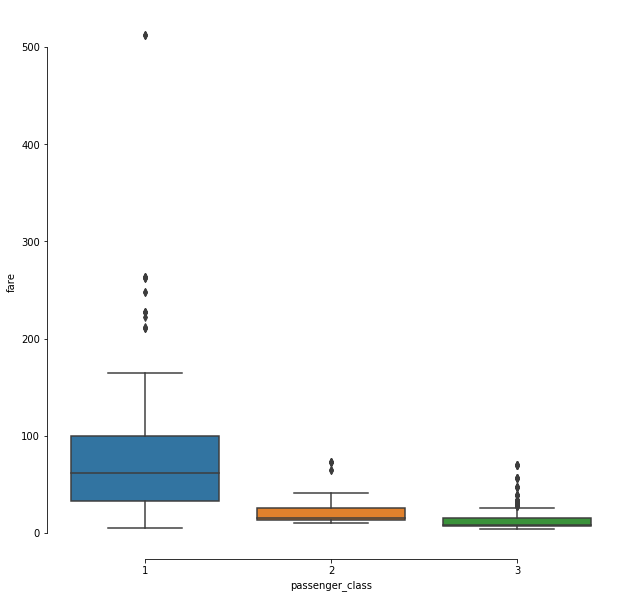

In [179]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="passenger_class", y="fare", data=df_titanic_novo.query('fare != 0'))
sns.despine(offset=5, trim=True);

In [181]:
# Média
df_titanic_novo.query('passenger_class == 3')['fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: fare, dtype: float64